In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
import copy
sns.set()
sns.set(font_scale=5.3)
PLOT_INDEX=1
if PLOT_INDEX == 1:
    ENVS = [
        "Hopper-v2",
        "Walker2d-v2",
        "fish-swim",
    ]
    horizons = [
        200,
        200,
        400,
    ]
    our_methods = [
        "lfiw_tper_linear_k10.0",
        "lfiw_tper_linear_k10.0",
        "lfiw_tper_linear_k10.0",
    ]
else:
    ENVS = [
        "HalfCheetah-v2",
        "Ant-v2",
        "Humanoid-v2",
    ]
    horizons = [
        400,
        400,
        1000,
    ]
    our_methods = [
        "lfiw_tper_linear_k10.0",
        "lfiw_tper_adapt_linear",
        "lfiw_tper_linear_k10.0",
    ]
ALGOS = [
        "sac_full", 
        # "lfiw_full", 
        "discor_full", 
        "discor_lfiw_full", 
        # "lfiw_tper_linear_full"
        ]

colors = {
    'sac_full': 'blue',
    "discor_full": 'green',
    "discor_lfiw_full": 'black',
    'lfiw_tper_adapt_linear': 'red',
    'lfiw_tper_linear_k10.0': 'red',
}
labels = {
    "discor_lfiw_full": "RM-Discor",
    "discor_full": "Discor",
    'lfiw_full': "Only On-policy Reweight",
    'tper_linear': "Only Step-based Reweight",
    'sac_full': 'SAC',
    'lfiw_tper_adapt_linear': 'RM-TCE',
    'lfiw_tper_linear_k10.0': 'RM-TCE'
}
MAX_STEP=5e6
ROLLING_STEP=10

Hopper-v2
sac_full
(4, 200)
discor_full
(4, 200)
discor_lfiw_full
(4, 200)
lfiw_tper_linear_k10.0
(4, 200)
Walker2d-v2
sac_full
(4, 200)
discor_full
(4, 200)
discor_lfiw_full
(4, 200)
lfiw_tper_linear_k10.0
(4, 200)
fish-swim
sac_full
(4, 400)
discor_full
(4, 400)
discor_lfiw_full
(4, 400)
lfiw_tper_linear_k10.0
(4, 400)


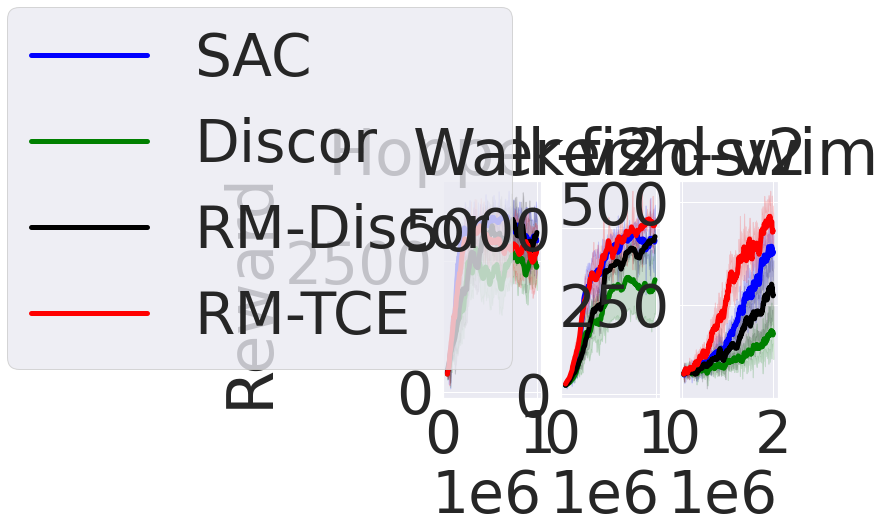

In [72]:

fig, axs = plt.subplots(1, 3)
index = -1
for EXP, horizon, our_method in zip(ENVS, horizons, our_methods):
    print(EXP)
    this_algo = copy.deepcopy(ALGOS)
    index += 1
    this_ax = axs[index]
    root_path = os.path.join("../../logs/"+EXP)
    this_algo.append(our_method)

    for algo in this_algo:
        print(algo)
        file = os.path.join(root_path, "%s-all.txt"%algo)
        with open(file, 'r') as f:
            content = f.readlines()
            all_rewards = []
            for line in content:
                line_data = []
                for i in line.split(" "):
                    try:
                        line_data.append(eval(i))
                    except SyntaxError:
                        # print("Warn: syntax err")
                        pass
                # print(len(line_data))
                all_rewards.append(line_data[:horizon])
        all_rewards = np.array(all_rewards)
        print(all_rewards.shape)
        rew_mean = np.mean(all_rewards, axis=0)
        df = pd.DataFrame(rew_mean)
        rew_mean = df[0].rolling(ROLLING_STEP).mean()
        rew_std = np.std(all_rewards, axis=0)
        x = np.arange(0, MAX_STEP, 5e3)[:len(rew_mean)]
        plot_index = np.arange(0, len(x), 1)
        rew_mean = rew_mean[plot_index]
        rew_std = rew_std[plot_index]
        x = x[plot_index]
        this_ax.plot(x, rew_mean, color=colors[algo], label=labels[algo], lw=5)
        this_ax.fill_between(x, rew_mean - 0.6*rew_std, rew_mean + 0.6*rew_std, color = colors[algo], alpha = 0.15)

    this_ax.set_title(EXP)
    if PLOT_INDEX == 2:
        this_ax.set_xlabel("Timestep")
    if index == 0:
        this_ax.legend()
        this_ax.set_ylabel("Reward")
    # this_ax.ticklabel_format(axis='y', style='sci', scilimits=(4,4))


In [73]:
length=15
fig.set_size_inches(length*4.0, length)
fig.savefig("reward-mujoco-three-%d.png"%PLOT_INDEX, bbox_inches = 'tight',
    pad_inches = 0)